<a href="https://colab.research.google.com/github/kazirafi17/SalesPrediction/blob/main/SalesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BigMart Sales Prediction


#### Project Description

Big Mart is a retail chain that operates both online and across multiple physical locations. The company's data scientist has collected 2013 sales data for 1559 products across 10 stores in various cities. This data includes sales amounts, along with specific attributes of each product and store. Using this data, the company aims to forecast future sales for each product at a particular store. This will help adjust their business strategy for future operations. Therefore, the goal of this project is to act as a data scientist, explore the collected data through Exploratory Data Analysis, and build a predictive model to forecast product sales at individual outlets.


# 1. Import Libraries and framework


In [ ]:
# Import necessary dependencies

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [ ]:
#for visualization- we use matplotlib, seaborn and ploty

import matplotlib.pyplot as plt #
import seaborn as sns
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots # plot subplot with plotly.graph_objects


# 2. Load/Import and Read the datasets¶


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Test.csv')

# 3. Data Cleaning and Preprocessing¶


#### 3.1 Explore the datasets

In [ ]:
df_train.head(5) # Display the first 5 rows of the train DataFrame

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [ ]:
df_train.info() # Display a concise summary of the train DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df_test.info() # Display a concise summary of the test DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [ ]:
df_train.describe()  # Display summary statistics for numerical columns

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [ ]:
df_test.describe()  # Display summary statistics for numerical columns

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year
count  4705.000000      5681.000000  5681.000000                5681.000000
mean     12.695633         0.065684   141.023273                1997.828903
std       4.664849         0.051252    61.809091                   8.372256
min       4.555000         0.000000    31.990000                1985.000000
25%       8.645000         0.027047    94.412000                1987.000000
50%      12.500000         0.054154   141.415400                1999.000000
75%      16.700000         0.093463   186.026600                2004.000000
max      21.350000         0.323637   266.588400                2009.000000

In [ ]:
df_train.isnull().sum()  # Display the number of missing values in each column

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df_test.isnull().sum()  # Display the number of missing values in each column

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
df_train.nunique()  # Display the number of unique values in each column

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [ ]:
df_train['Item_Fat_Content'].value_counts()  # Count the occurrences of each unique value in the 'Item_Fat_Content' column

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

Irregularities found in Item_Fat_Content column. Here, 5 different categorical values but it should be only two. 'LF' & 'low fat' should be considered as 'Low Fat'. And also 'reg' should be considered as 'Regular'.

In [ ]:
df_train.duplicated().sum() # Check for duplicate rows in the DataFrame and return a boolean Series

0

### Important Insights:

*   Significant missing values in Item_Weight and Outlet_Size need to be addressed.
*  7 object columns, 4 float64 columns, 1 int64 column
*   No duplicated value

#### 3.2 Handling Missing Values and Duplicats¶


In [ ]:
# Create a copy of the original DataFrames to preserve the original data
df = df_train.copy()  # Train dataset
df_test = df_test.copy()  # Unseen dataset for evaluation
datasets = [("Training dataset", df), ("Testing dataset", df_test)]

# Fill missing values in 'Item_Weight' column with the mean value of the column in both datasets
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(), inplace=True)

# Create a pivot table to calculate mode of 'Outlet_Size' for each 'Outlet_Type'
mode_of_Outlet_size = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
# Identify missing values in 'Outlet_Size'
miss_values = df['Outlet_Size'].isnull()
# Fill missing values in 'Outlet_Size' based on 'Outlet_Type'
df.loc[miss_values, 'Outlet_Size'] = df.loc[miss_values, 'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])


In [ ]:
# Define a function to check for missing values in multiple datasets
def check_missing_values(*datasets):
    for dataset_name, dataset in datasets:
        missing_values_count = dataset.isnull().sum()  # Count missing values in each column
        if missing_values_count.sum() == 0:
            print(f"No missing values in {dataset_name}")
        else:
            print(f"Missing values in {dataset_name}:")
            print(missing_values_count)

# Print a summary of missing values for the training and testing datasets
print("Summary of missing values:")
check_missing_values(("Training dataset", df), ("Testing dataset", df_test))

Summary of missing values:
No missing values in Training dataset
Missing values in Testing dataset:
Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


#### 3.3 Handling Irregularities

In [ ]:
# Replace values in 'Item_Fat_Content' column with standardized values for both train and test datasets
df.replace({'Item_Fat_Content': {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}}, inplace=True)
df_test.replace({'Item_Fat_Content': {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}}, inplace=True)

# Count the occurrences of each value in the 'Item_Fat_Content' column in the train dataset
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

#### 3.4 Detecting and Handling Outliers




In [ ]:
import pandas as pd

def detect_outliers(df_train, df_test, columns):
    outliers_train = pd.DataFrame(columns=df_train.columns)  # Initialize empty DataFrame for outliers in train
    outliers_test = pd.DataFrame(columns=df_test.columns)    # Initialize empty DataFrame for outliers in test

    # Handle columns present in train dataset
    for col in columns:
        if col in df_train.columns:
            # Calculate Q1, Q3, and IQR for train dataset
            Q1_train = df_train[col].quantile(0.25)
            Q3_train = df_train[col].quantile(0.75)
            IQR_train = Q3_train - Q1_train

            # Calculate bounds for outliers in train dataset
            lower_bound_train = Q1_train - 1.5 * IQR_train
            upper_bound_train = Q3_train + 1.5 * IQR_train

            # Identify outliers in train dataset
            outliers_train_col = df_train[(df_train[col] < lower_bound_train) | (df_train[col] > upper_bound_train)]

            # Append outliers found in current column to outliers_train DataFrame
            outliers_train = pd.concat([outliers_train, outliers_train_col])

            # Print number of outliers found in train dataset for column
            print(f"Number of outliers in train dataset for column '{col}': {outliers_train_col.shape[0]}")

        if col in df_test.columns:
            # Calculate Q1, Q3, and IQR for test dataset
            Q1_test = df_test[col].quantile(0.25)
            Q3_test = df_test[col].quantile(0.75)
            IQR_test = Q3_test - Q1_test

            # Calculate bounds for outliers in test dataset
            lower_bound_test = Q1_test - 1.5 * IQR_test
            upper_bound_test = Q3_test + 1.5 * IQR_test

            # Identify outliers in test dataset
            outliers_test_col = df_test[(df_test[col] < lower_bound_test) | (df_test[col] > upper_bound_test)]

            # Append outliers found in current column to outliers_test DataFrame
            outliers_test = pd.concat([outliers_test, outliers_test_col])

            # Print number of outliers found in test dataset for column
            print(f"Number of outliers in test dataset for column '{col}': {outliers_test_col.shape[0]}")

# Assuming df_train and df_test are already defined DataFrames
# If not, replace these with your actual DataFrames loading or creation logic

# Example: defining columns of interest based on numerical data types
columns_of_interest_train = df_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
columns_of_interest_test = df_test.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Detect outliers using the function
detect_outliers(df_train, df_test, columns_of_interest_train)


Number of outliers in train dataset for column 'Item_Weight': 0
Number of outliers in test dataset for column 'Item_Weight': 0
Number of outliers in train dataset for column 'Item_Visibility': 144
Number of outliers in test dataset for column 'Item_Visibility': 113
Number of outliers in train dataset for column 'Item_MRP': 0
Number of outliers in test dataset for column 'Item_MRP': 0
Number of outliers in train dataset for column 'Outlet_Establishment_Year': 0
Number of outliers in test dataset for column 'Outlet_Establishment_Year': 0
Number of outliers in train dataset for column 'Item_Outlet_Sales': 186


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create subplots
fig = make_subplots(rows=1, cols=2, column_widths=[0.6, 0.4])
marker_style = dict(line_color='black', line_width=1, opacity=1, size=8)

# Adding traces for Item Visibility (IV)
fig.add_trace(go.Scatter(y=df['Item_Visibility'],
                         mode='markers', marker=marker_style,
                         name="IV_Training"), row=1, col=1)
fig.add_trace(go.Scatter(y=df_test['Item_Visibility'],
                         mode='markers', marker=marker_style,
                         name="IV_Testing"), row=1, col=1)

# Adding traces for Item Outlet Sales (IOS)
fig.add_trace(go.Scatter(y=df['Item_Outlet_Sales'],
                         mode='markers',
                         marker=dict(color='green', **marker_style),
                         name="IOS_Testing"), row=1, col=2)

# Update x-axis titles
fig.update_xaxes(row=1, col=1, title_text='Feature: Item Visibility (IV)')
fig.update_xaxes(row=1, col=2, title_text='Feature: Item Outlet Sales (IOS)')

# Update layout and axis settings
fig.update_xaxes(showgrid=False, rangemode='nonnegative')
fig.update_yaxes(title_text='Values', showgrid=False, rangemode='nonnegative')

# Update overall layout settings
fig.update_layout(
    font_family="Open Sans",
    title=dict(text='Training Datasets Outliers', font=dict(size=22, color='black'), x=0.5),
    margin=dict(t=50, b=10, l=10, pad=0),
    width=1100, height=400,
    template='seaborn'
)

# Show the figure
fig.show()


# 4. Explanatory Data Analysis

#### 4.1 Uni-variate Analysis for continous variables

Examine skewness of every columns of both training and testing dataset and also plotting to visulalize it. If we found highly skewed datasets we try to normalize it, as many regression algorithms perform better at normal distribution.


In [ ]:
# Calculate skewness for each numeric column and print the results
def calculate_skewness(dataset_name, df):
    numeric_columns = [col for col in df.columns if df[col].dtype in ['float64', 'int64']]
    skewness = df[numeric_columns].skew()

    print(f'Skewness of numeric columns in {dataset_name}:')
    for idx, column in enumerate(numeric_columns, start=1):
        print(f'{idx}. {column}: {skewness[column]}')


# Assuming df and df_test are your datasets
calculate_skewness('Training Dataset', df)
print("￣ ￣ ￣" * 10)
calculate_skewness('Testing Dataset', df_test)


Skewness of numeric columns in Training Dataset:
1. Item_Weight: 0.09056145191767477
2. Item_Visibility: 1.1670905496918396
3. Item_MRP: 0.1272022683110526
4. Outlet_Establishment_Year: -0.39664078591550556
5. Item_Outlet_Sales: 1.1775306028542796
￣ ￣ ￣￣ ￣ ￣￣ ￣ ￣￣ ￣ ￣￣ ￣ ￣￣ ￣ ￣￣ ￣ ￣￣ ￣ ￣￣ ￣ ￣￣ ￣ ￣
Skewness of numeric columns in Testing Dataset:
1. Item_Weight: 0.1428133167932425
2. Item_Visibility: 1.2383124276598971
3. Item_MRP: 0.13618153880370937
4. Outlet_Establishment_Year: -0.39630647225627247


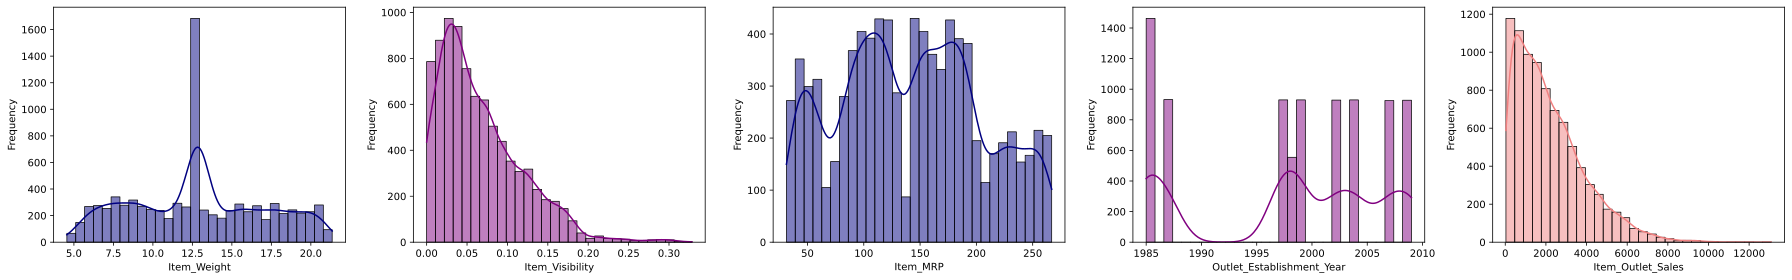

In [ ]:
# List of columns to plot
columns_to_plot = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
# List of colors for each plot
colors = ['navy', 'purple', 'navy', 'purple', 'lightcoral']

# Create subplots
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(len(columns_to_plot) * 5, 4))  # 1 row, len(columns_to_plot) columns

# Plotting the columns
for i, column in enumerate(columns_to_plot):
    sns.histplot(df[column], bins=30, kde=True, ax=axes[i], color=colors[i])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


### Observations for Skewness:

- **Symmetric Distributions**: `Item_Weight` and `Item_MRP` have skewness values close to zero, indicating approximately symmetric distributions.

- **Positively Skewed Distributions**: Both `Item_Visibility` and `Item_Outlet_Sales` exhibit high positive skewness, indicating distributions with a concentration of lower values and a tail extending towards higher values.

- **Negatively Skewed Distribution**: `Outlet_Establishment_Year` shows negative skewness, suggesting a concentration of establishment years towards earlier dates with a tail towards more recent years.


#### 4.2 Univariate Analysis for Discrete/Categorical Features

In [ ]:
# Convert 'Outlet_Establishment_Year' column to datetime format
df['Outlet_Establishment_Year'] = pd.to_datetime(df['Outlet_Establishment_Year'], format='%Y')

# Extract year from datetime and convert back to four-digit year string
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].dt.strftime('%Y')

def categorical_cols(data):
    categorical_cols = [col for col in data.columns if data[col].dtype == 'object']

    summary = []

    for column in categorical_cols:
        total_items = len(data[column])  # Count total items in the column
        unique_counts = data[column].nunique()  # Count unique values in the column
        summary.append({
            'Column': column,
            'Total Items': total_items,
            'Unique Counts': unique_counts
        })

    # Create a DataFrame from the summary list of dictionaries
    categorical_columns_df = pd.DataFrame(summary)

    return categorical_columns_df  # Return the DataFrame containing categorical column summaries

# Example usage:
# Assuming 'df' is your DataFrame
result = categorical_cols(df)
print('All the categorical features:',result)


All the categorical features:                       Column  Total Items  Unique Counts
0            Item_Identifier         8523           1559
1           Item_Fat_Content         8523              2
2                  Item_Type         8523             16
3          Outlet_Identifier         8523             10
4  Outlet_Establishment_Year         8523              9
5                Outlet_Size         8523              3
6       Outlet_Location_Type         8523              3
7                Outlet_Type         8523              4


We first analyze the features that describe the item and then rest of the features related to outlet.

<ipython-input-23-bc682fb4ee17>:17: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-23-bc682fb4ee17>:30: UserWarning:

FixedFormatter should only be used together with FixedLocator



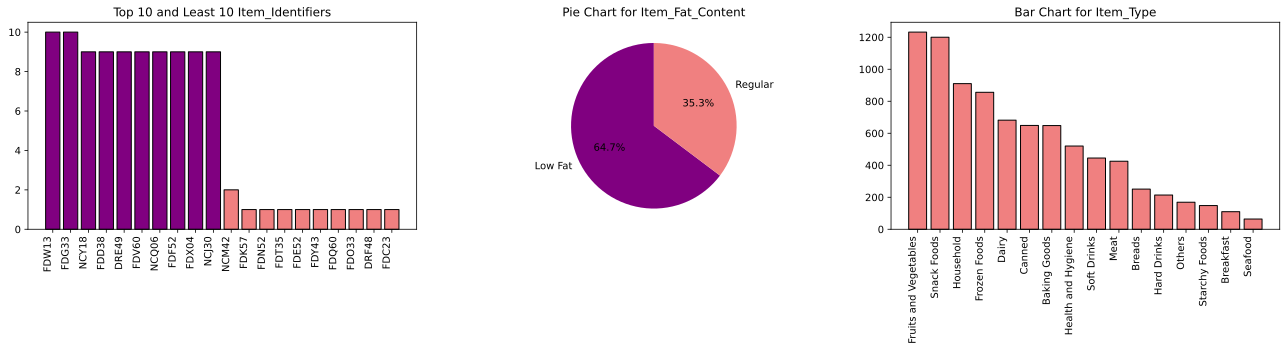

In [ ]:
# Get top 10 and least 10 Item_Identifiers by count
top_10 = df['Item_Identifier'].value_counts().head(10)
least_10 = df['Item_Identifier'].value_counts().tail(10)

# Concatenate the two series
combined = pd.concat([top_10, least_10])

# Get Item_Type counts
Item_Type_counts = df['Item_Type'].value_counts()

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot top 10 and least 10 in one bar chart
bars1 = axes[0].bar(combined.index, combined.values, color=['purple']*10 + ['lightcoral']*10, edgecolor='black')
axes[0].set_title('Top 10 and Least 10 Item_Identifiers')
axes[0].set_xticklabels(combined.index, rotation=90, ha='right')


# Plot pie chart for Item_Fat_Content
colors = ['purple', 'lightcoral']
fat_content_counts = df['Item_Fat_Content'].value_counts()
axes[1].pie(fat_content_counts, labels=fat_content_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Pie Chart for Item_Fat_Content')


# Plot bar chart for Item_Type
bars2 = axes[2].bar(Item_Type_counts.index, Item_Type_counts.values, color='lightcoral', edgecolor='black')
axes[2].set_title('Bar Chart for Item_Type')
axes[2].set_xticklabels(Item_Type_counts.index, rotation=90, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()


**Observations:**


*   The majority of the items are either low fat or regular, with a higher proportion being low fat.
*   Fruits and vegetables, snack foods, and household items are the most common item types.
*   Seafood, breakfast items, and hard drinks are the least common item types.











Now, plotting the features related to outlet.

<ipython-input-24-ee0d61d4799a>:7: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-24-ee0d61d4799a>:12: UserWarning:

FixedFormatter should only be used together with FixedLocator



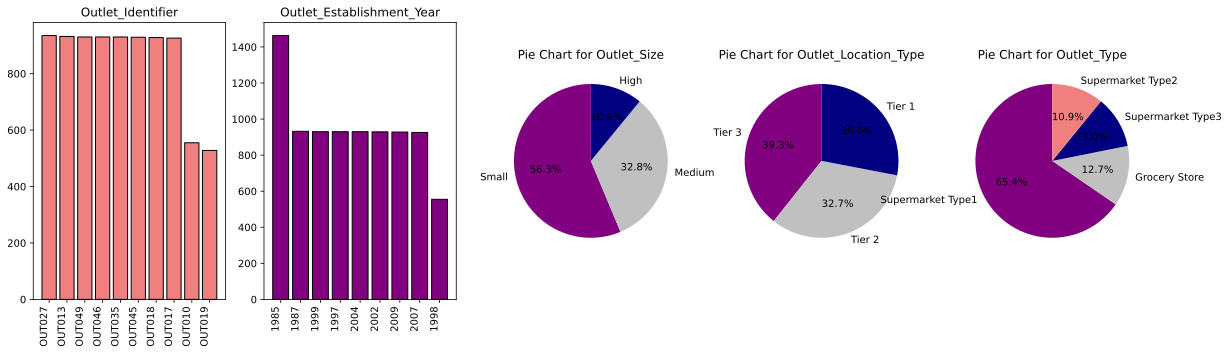

In [ ]:
def plot_subplots(df):
    fig, axes = plt.subplots(1, 5, figsize=(20, 5))

    # Plot bar chart for Outlet_Type
    bars3 = axes[0].bar(df['Outlet_Identifier'].value_counts().index, df['Outlet_Identifier'].value_counts().values, color='lightcoral', edgecolor='black')
    axes[0].set_title('Outlet_Identifier')
    axes[0].set_xticklabels(df['Outlet_Identifier'].value_counts().index, rotation=90, ha='right')

    # Plot bar chart for Outlet_Establishment_Year
    bars4 = axes[1].bar(df['Outlet_Establishment_Year'].value_counts().index, df['Outlet_Establishment_Year'].value_counts().values, color='purple', edgecolor='black')
    axes[1].set_title('Outlet_Establishment_Year')
    axes[1].set_xticklabels(df['Outlet_Establishment_Year'].value_counts().index, rotation=90, ha='right')

    # Plot pie chart for Outlet_Size
    colors = ['purple', 'silver', 'navy', 'black']
    Outlet_Size_counts = df['Outlet_Size'].value_counts()
    axes[2].pie(Outlet_Size_counts, labels=Outlet_Size_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
    axes[2].set_title('Pie Chart for Outlet_Size')

    # Plot pie chart for Outlet_Location_Type
    colors = ['purple', 'silver', 'navy', 'coral']
    Outlet_Location_Type_counts = df['Outlet_Location_Type'].value_counts()
    axes[3].pie(Outlet_Location_Type_counts, labels=Outlet_Location_Type_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
    axes[3].set_title('Pie Chart for Outlet_Location_Type')

    # Plot pie chart for Outlet_Type
    colors = ['purple', 'silver', 'navy', 'lightcoral']
    Outlet_Type_counts = df['Outlet_Type'].value_counts()
    axes[4].pie(Outlet_Type_counts, labels=Outlet_Type_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
    axes[4].set_title('Pie Chart for Outlet_Type')

    plt.show()

# Example usage:
# Assuming df is your DataFrame containing the necessary data
plot_subplots(df)


**Observations:**

*   All the outlets have the similar sales instances except 'OUT010' and 'OUT019', which have less sales.
*   Outlet established in 1985 records the highest sales whereas outlet established in 1998 lowest.







#### 4.2 Bivariate and multivariate analysis

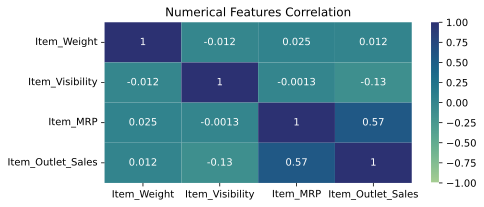

In [ ]:
# List of numerical columns
num_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# Calculate correlation matrix from the DataFrame
corr_matrix = df[num_cols].corr()

# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(7, 3))

# Plot heatmap of the correlation matrix
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='crest', ax=ax)

# Set plot title
plt.title("Numerical Features Correlation")

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


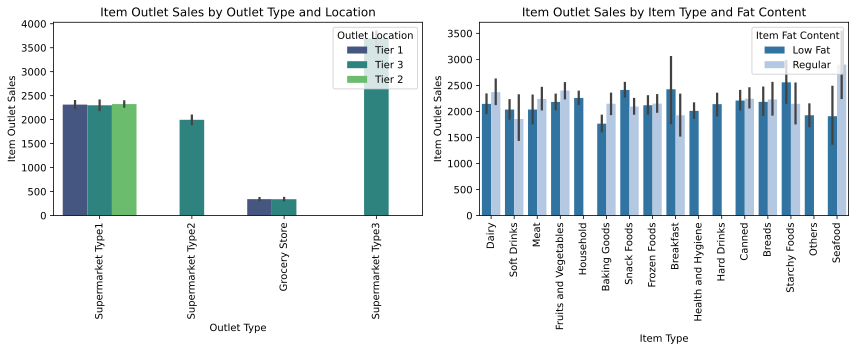

In [ ]:
def plot_dual_barplots(df):
    # Set up subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Plot 1: Bar plot with multiple hues
    sns.barplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Location_Type', palette='viridis', ax=axes[0])
    axes[0].set_xlabel('Outlet Type')
    axes[0].set_ylabel('Item Outlet Sales')
    axes[0].set_title('Item Outlet Sales by Outlet Type and Location')
    axes[0].legend(title='Outlet Location', loc='upper right')
    axes[0].tick_params(axis='x', rotation=90)

    # Plot 2: Bar plot with custom palette
    sns.barplot(data=df, x='Item_Type', y='Item_Outlet_Sales', hue='Item_Fat_Content', palette='tab20', ax=axes[1])
    axes[1].set_xlabel('Item Type')
    axes[1].set_ylabel('Item Outlet Sales')
    axes[1].set_title('Item Outlet Sales by Item Type and Fat Content')
    axes[1].legend(title='Item Fat Content', loc='upper right')
    axes[1].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

# Example usage:
plot_dual_barplots(df)



In [ ]:
def scatter_plots(df):
    # Set up subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Plot 1: Scatter plot of Item Visibility vs Outlet Sales
    sns.scatterplot(data=df, x='Item_Visibility', y='Item_Outlet_Sales', hue='Item_Fat_Content', style='Outlet_Size',
                    palette='viridis', s=100, edgecolor='black', alpha=0.8, ax=axes[0])
    axes[0].set_xlabel('Item Visibility')
    axes[0].set_ylabel('Item Outlet Sales')
    axes[0].set_title('Item Visibility vs Outlet Sales')
    axes[0].legend(title='Item Fat Content', loc='upper right')

    # Plot 2: Scatter plot of Item MRP vs Outlet Sales
    sns.scatterplot(data=df, x='Item_MRP', y='Item_Outlet_Sales', hue='Outlet_Location_Type',
                    palette='tab20', s=100, edgecolor='black', alpha=0.8, ax=axes[1])
    axes[1].set_xlabel('Item MRP')
    axes[1].set_ylabel('Item Outlet Sales')
    axes[1].set_title('Item MRP vs Outlet Sales')

    # Plot 3: Scatter plot of Item Weight vs Outlet Sales
    sns.scatterplot(data=df, x='Item_Weight', y='Item_Outlet_Sales', hue='Outlet_Type',
                    palette='viridis', s=100, edgecolor='black', alpha=0.8, ax=axes[2])
    axes[2].set_xlabel('Item Weight')
    axes[2].set_ylabel('Item Outlet Sales')
    axes[2].set_title('Item Weight vs Item Outlet Sales')

    plt.tight_layout()
    plt.show()

# Example usage:
scatter_plots(df)


#### Insights:




**From heatmap:**
*   **Item Visibility:** The negative correlation with outlet sales suggests that more visible items (likely placed in prominent locations) may not necessarily sell better. This could imply that factors other than visibility, such as pricing or consumer preferences, play a significant role in sales.
*   **Item MRP:** The positive correlation indicates that pricing strategy significantly impacts sales. Items with higher MRPs tend to generate higher sales, indicating that customers may be willing to pay more for perceived value or premium products.

**Left Chart: Item Outlet Sales by Outlet Type and Location**


*  In Supermarket Type 1 sales are fairly consistent across all tiers (Tier 1, Tier 2, and Tier 3), each with sales around 2500 units.
*   Grocery Stores in Tier 1 locations have much lower sales compared to Supermarkets.
*   In Supermarket Type 3 only Tier 2 data is present.
Sales are extremely high, around 3500 units, making it the highest among all outlet types and locations.

**Right Chart: Item Outlet Sales by Item Type and Fat Content**


*   Across all item types, low-fat items generally have lower sales compared to regular items, with few exceptions.
*   Health and Hygiene and Frozen Foods show notably higher sales compared to other categories.These categories have a significant sales difference between low-fat and regular items, with regular items selling more.
*   Dairy, Soft Drinks, Meat, Fruits and Vegetables, Household, and Snack Foods show relatively balanced sales between low-fat and regular items, though regular still tends to lead slightly.
*   Canned, Breads, Starchy Foods, Others, and Seafood have lower sales overall.


**Summary**

**Outlet Performance:** Supermarket Type 3 in Tier 2 and Supermarket Type 1 across all tiers are the top performers in terms of sales, while Grocery Stores in Tier 1 lag behind significantly.

**Item Preference:** Regular items generally outsell low-fat items across most categories, with Health and Hygiene, and Frozen Foods being the top-selling categories.











# 5. Feature Engineering

In [ ]:
# Fetch categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
  unique_counts = df[col].nunique()
  unique_values = df[col].unique()[:20]
  print(f"{col}' has {unique_counts} unique values. They are: \n {unique_values.tolist()}")
  print("---"*8)


Item_Identifier' has 1559 unique values. They are: 
 ['FDA15', 'DRC01', 'FDN15', 'FDX07', 'NCD19', 'FDP36', 'FDO10', 'FDP10', 'FDH17', 'FDU28', 'FDY07', 'FDA03', 'FDX32', 'FDS46', 'FDF32', 'FDP49', 'NCB42', 'DRI11', 'FDU02', 'FDN22']
------------------------
Item_Fat_Content' has 2 unique values. They are: 
 ['Low Fat', 'Regular']
------------------------
Item_Type' has 16 unique values. They are: 
 ['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables', 'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods', 'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned', 'Breads', 'Starchy Foods', 'Others', 'Seafood']
------------------------
Outlet_Identifier' has 10 unique values. They are: 
 ['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045', 'OUT017', 'OUT046', 'OUT035', 'OUT019']
------------------------
Outlet_Establishment_Year' has 9 unique values. They are: 
 ['1999', '2009', '1998', '1987', '1985', '2002', '2007', '1997', '2004']
------------------------
Outlet_Si


*   **Label Encoding** is applied to `Outlet_Type`, `Item_Fat_Content`,  `Outlet_Size`, and `Outlet_Location_Type`.
*   **One-Hot Encoding** is applied to `Item_Type` and `Item_Identifier`,`Outlet_Identifier`.
*  `Outlet_Establishment_Year` is converted to `Outlet_Age.`




#### 5.1: Label Encoding


In [ ]:
# Convert Outlet_Establishment_Year to Outlet_Age
this_year = 2024
df['Outlet_Age'] = this_year - df['Outlet_Establishment_Year'].astype(int)

# Manual Encoding for ordinal features
df['Outlet_Size'] = df['Outlet_Size'].replace({'Small': 1, 'Medium': 2, 'High': 3})
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].replace({'Tier 1': 1, 'Tier 2': 2, 'Tier 3': 3})

# Label Encoding for nominal features
le = LabelEncoder()
df['Item_Fat_Content'] = le.fit_transform(df['Item_Fat_Content'])
df['Outlet_Type'] = le.fit_transform(df['Outlet_Type'])


#### 5.2: OneHotEncoding

In [ ]:
# Extract the first two initials of Item_Identifier
df['Item_Identifier'] = df['Item_Identifier'].str[:2]

# One-Hot Encoding using sklearn OneHotEncoder
ohe = OneHotEncoder(sparse=False, drop='first')


# Fit and transform the columns
encoded_features = ohe.fit_transform(df[['Item_Identifier', 'Item_Type','Outlet_Identifier']])

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=ohe.get_feature_names_out(['Item_Identifier', 'Item_Type','Outlet_Identifier']))

# Concatenate the original DataFrame with the encoded features
df = pd.concat([df.drop(columns=['Item_Identifier', 'Item_Type','Outlet_Identifier']), encoded_df], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



#### 5.3: Transformation

We found that `Item_Visibility` feature is poritively skewed. The Box-Cox transformation can help reduce this skewness. Let's proceed with the Box-Cox transformation and visualize its effect. We'll also compare it to other transformations like the log and square root transformations.

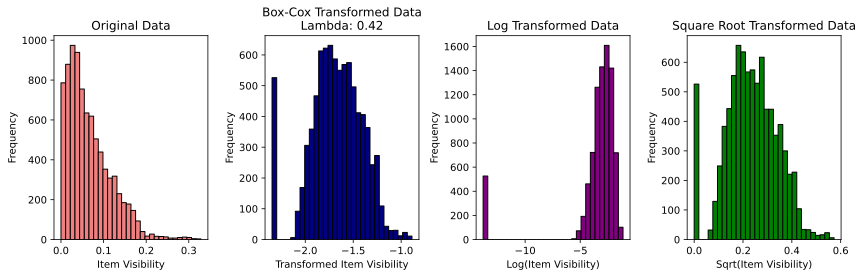

Original Skewness: 1.1669
Box-Cox Skewness: -0.4045
Log Skewness: -3.1760
Square Root Skewness: -0.0980


In [ ]:
from scipy import stats

# Extract the skewed data
skewed_data = df['Item_Visibility']

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(12, 4))

# Plot original data
axes[0].hist(skewed_data, bins=30, color='lightcoral', edgecolor='black')
axes[0].set_title('Original Data')
axes[0].set_xlabel('Item Visibility')
axes[0].set_ylabel('Frequency')

# Apply Box-Cox transformation
data_transformed, lmbda = stats.boxcox(skewed_data + 1e-6)  # Add a small value to avoid log(0)
axes[1].hist(data_transformed, bins=30, color='navy', edgecolor='black')
axes[1].set_title(f'Box-Cox Transformed Data\nLambda: {lmbda:.2f}')
axes[1].set_xlabel('Transformed Item Visibility')
axes[1].set_ylabel('Frequency')

# Apply log transformation
data_log_transformed = np.log(skewed_data + 1e-6)  # Add a small value to avoid log(0)
axes[2].hist(data_log_transformed, bins=30, color='purple', edgecolor='black')
axes[2].set_title('Log Transformed Data')
axes[2].set_xlabel('Log(Item Visibility)')
axes[2].set_ylabel('Frequency')

# Apply square root transformation
data_sqrt_transformed = np.sqrt(skewed_data)
axes[3].hist(data_sqrt_transformed, bins=30, color='green', edgecolor='black')
axes[3].set_title('Square Root Transformed Data')
axes[3].set_xlabel('Sqrt(Item Visibility)')
axes[3].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Compare skewness
original_skewness = stats.skew(skewed_data)
boxcox_skewness = stats.skew(data_transformed)
log_skewness = stats.skew(data_log_transformed)
sqrt_skewness = stats.skew(data_sqrt_transformed)

print(f'Original Skewness: {original_skewness:.4f}')
print(f'Box-Cox Skewness: {boxcox_skewness:.4f}')
print(f'Log Skewness: {log_skewness:.4f}')
print(f'Square Root Skewness: {sqrt_skewness:.4f}')


Given the skewness values, the square root transformation appears to be the best choice as it resulted in a skewness value closest to zero.

In [ ]:
# Apply square root transformation
df['Item_Visibility_Sqrt'] = np.sqrt(df['Item_Visibility'])

#### 5.4: Scaling

As our data is now normally distributed we're going to use standard scaling to standardize the range or scale.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Select features for scaling (numerical columns)
scalled_features = ['Item_Weight','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet_Age','Item_Visibility_Sqrt']

# Apply StandardScaler to selected features
df[scalled_features] = scaler.fit_transform(df[scalled_features])

# 6. Model Selection and Evaluation

In [ ]:
# separate the target variable and the features

X = df.drop(['Outlet_Establishment_Year','Item_Visibility','Item_Outlet_Sales'],axis=1)
y = df['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import numpy as np
import pandas as pd

# Create a list of models to evaluate
models = []
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('Elastic', ElasticNet()))
models.append(('SVR', SVR()))
models.append(('DecisionTree', DecisionTreeRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('XGB', XGBRegressor()))

# Base line Model evaluation
results_train = {'Model': [], 'R2_train': [], 'MAE_train': [], 'RMSE_train': []}
results_test = {'Model': [], 'R2_test': [], 'MAE_test': [], 'RMSE_test': []}

for name, model in models:
    # Train evaluation
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

    results_train['Model'].append(name)
    results_train['R2_train'].append("{:.3f}".format(train_r2))
    results_train['MAE_train'].append("{:.3f}".format(train_mae))
    results_train['RMSE_train'].append("{:.3f}".format(train_rmse))

    # Test evaluation
    y_test_pred = model.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    results_test['Model'].append(name)
    results_test['R2_test'].append("{:.3f}".format(test_r2))
    results_test['MAE_test'].append("{:.3f}".format(test_mae))
    results_test['RMSE_test'].append("{:.3f}".format(test_rmse))

# Convert results to DataFrame for easier manipulation
results_train_df = pd.DataFrame(results_train)
results_test_df = pd.DataFrame(results_test)

# Merge train and test results based on 'Model' column
results_df = pd.merge(results_train_df, results_test_df, on='Model')

print("Model evaluation results:\n", results_df)


Model evaluation results:
           Model R2_train MAE_train RMSE_train R2_test  MAE_test RMSE_test
0            LR    0.568   824.608   1112.482   0.545   875.575  1185.808
1         Ridge    0.568   824.580   1112.482   0.545   875.549  1185.785
2         Lasso    0.568   824.451   1112.723   0.545   874.480  1184.610
3       Elastic    0.459   937.603   1245.218   0.438   991.549  1317.374
4           SVR    0.068  1210.234   1634.288   0.049  1251.838  1713.694
5  DecisionTree    1.000     0.000      0.000   0.216  1098.190  1555.909
6  RandomForest    0.939   290.814    419.257   0.552   824.586  1176.240
7           KNN    0.667   695.973    977.714   0.481   891.884  1265.168
8           XGB    0.869   441.127    612.286   0.520   857.317  1217.273


**Observations:**



*   `RandomForest` shows strong performance with high R2 scores on both training and test sets, indicating good predictive capability without significant overfitting.

*   `XGBoost` also performs well with high R2 scores and relatively low MAE and RMSE on both datasets, suggesting robustness and good generalization.

*   Both `Linear Regression` and `Ridge Regression` show consistent performance with moderate R2 scores and similar MAE and RMSE values on both training and test sets.






# 7. Hyperparameter Tuning


In [ ]:
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Define parameter grids
param_grid_ridge = {'alpha': [0.1, 1.0, 10.0, 100.0]}
param_grid_lasso = {'alpha': [0.1, 1.0, 10.0, 100.0]}
param_grid_rf = {'n_estimators': [100, 200],
                 'max_depth': [None, 10, 20],
                 'min_samples_split': [2, 5],
                 'min_samples_leaf': [1, 2]}
param_grid_xgb = {'n_estimators': [100, 200],
                  'max_depth': [3, 6, 9],
                  'learning_rate': [0.01, 0.1, 0.2],
                  'subsample': [0.6, 0.8, 1.0],
                  'colsample_bytree': [0.6, 0.8, 1.0]}

# Define models
models = {
    'Ridge': (Ridge(), param_grid_ridge),
    'Lasso': (Lasso(), param_grid_lasso),
    'RandomForest': (RandomForestRegressor(), param_grid_rf),
    'XGB': (XGBRegressor(), param_grid_xgb)
}

results = []

for name, (model, param_grid) in models.items():
    print(f"Parameters for {name}:")
    print(param_grid)
    print("--"*10)

    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    # Training metrics
    y_train_pred = best_model.predict(X_train)
    r2_train = r2_score(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)

    # Testing metrics
    y_test_pred = best_model.predict(X_test)
    r2_test = r2_score(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

    # Append results
    results.append({
        'Model': name,
        'R2_train': r2_train,
        'MAE_train': mae_train,
        'RMSE_train': rmse_train,
        'R2_test': r2_test,
        'MAE_test': mae_test,
        'RMSE_test': rmse_test
    })

    # Print best params and metrics
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"R2_train: {r2_train:.4f}, MAE_train: {mae_train:.4f}, RMSE_train: {rmse_train:.4f}")
    print(f"R2_test: {r2_test:.4f}, MAE_test: {mae_test:.4f}, RMSE_test: {rmse_test:.4f}")
    print("---"*10)

# Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df[['Model', 'R2_train', 'MAE_train', 'RMSE_train', 'R2_test', 'MAE_test', 'RMSE_test']])


Parameters for Ridge:
{'alpha': [0.1, 1.0, 10.0, 100.0]}
--------------------
Best parameters for Ridge: {'alpha': 10.0}
R2_train: 0.5683, MAE_train: 824.3313, RMSE_train: 1112.5214
R2_test: 0.5446, MAE_test: 875.3545, RMSE_test: 1185.6629
------------------------------
Parameters for Lasso:
{'alpha': [0.1, 1.0, 10.0, 100.0]}
--------------------
Best parameters for Lasso: {'alpha': 1.0}
R2_train: 0.5681, MAE_train: 824.4513, RMSE_train: 1112.7230
R2_test: 0.5454, MAE_test: 874.4799, RMSE_test: 1184.6095
------------------------------
Parameters for RandomForest:
{'n_estimators': [100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}
--------------------
Best parameters for RandomForest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
R2_train: 0.7235, MAE_train: 629.1680, RMSE_train: 890.3703
R2_test: 0.5754, MAE_test: 795.4596, RMSE_test: 1144.8323
------------------------------
Parameters for XGB:
{'n_e

The results show that the `Random Forest and XGBoost` models perform better than `Ridge and Lasso`.

Between, `Random Forest and XGBoost` I choose `XGBoost` because `Random Forest` has overfitting issue.

# 8. Create Feature importance from model and Save the model


Computes and plots the feature importance scores of the XGBoost model.Performs RFE with cross-validation to rank features by their importance.
And evaluates the model's performance with different numbers of features using cross-validation.Evaluates the model's performance on the training and testing data using the best features.Then print the comparision the initial model performance with the performance after feature selection.

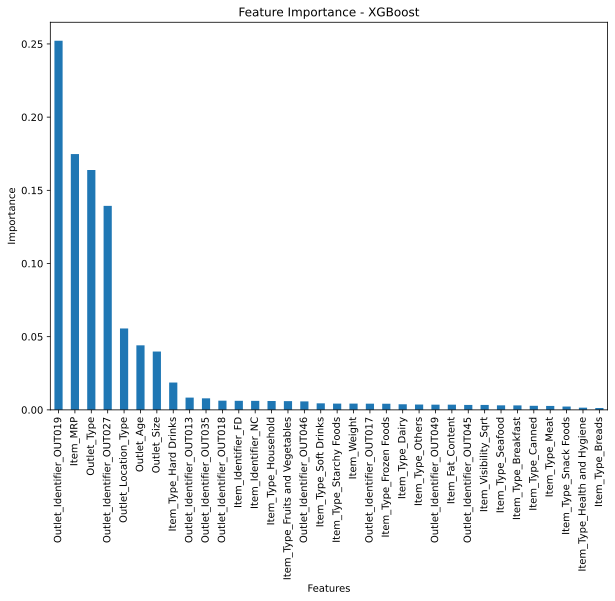

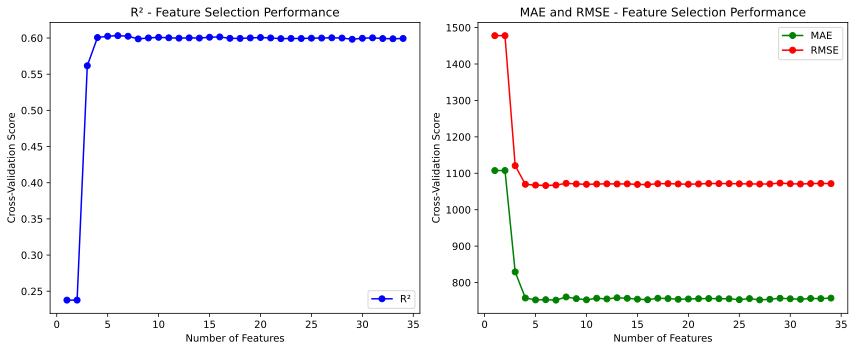


Best Features Selected:
['Outlet_Type', 'Outlet_Identifier_OUT027', 'Item_MRP', 'Outlet_Identifier_OUT019', 'Outlet_Age', 'Outlet_Identifier_OUT035']


In [ ]:
from sklearn.feature_selection import RFE

# Define XGBoost parameters
params = {'colsample_bytree': 0.6,
          'learning_rate': 0.1,
          'max_depth': 3,
          'n_estimators': 100,
          'subsample': 1.0}

# Initialize XGBoost model
xgb_model = XGBRegressor(**params)

# Fit the model on training data
xgb_model.fit(X_train, y_train)

# Predict on training and testing data
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Evaluate model performance
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)

r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)


# Plot feature importance with feature names
feature_importance = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
feature_importance_sorted = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(10, 7))
feature_importance_sorted.plot(kind='bar')
plt.title('Feature Importance - XGBoost')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Perform Recursive Feature Elimination with Cross-Validation
rfe = RFE(estimator=xgb_model, n_features_to_select=1, step=1)
rfe.fit(X_train, y_train)

# Rank features by importance
feature_ranking = rfe.ranking_

# Create a DataFrame to store results
results = pd.DataFrame(columns=['Num_Features', 'Feature_Names', 'R2_CV', 'MAE_CV', 'RMSE_CV'])

# Evaluate performance with different number of features
for n_features in range(1, len(feature_ranking) + 1):
    selected_features = np.argsort(feature_ranking)[:n_features]
    selected_feature_names = X_train.columns[selected_features].tolist()
    X_train_selected = X_train.iloc[:, selected_features]
    X_test_selected = X_test.iloc[:, selected_features]

    # Cross-validation scores
    r2_cv = cross_val_score(xgb_model, X_train_selected, y_train, cv=5, scoring='r2').mean()
    mae_cv = -cross_val_score(xgb_model, X_train_selected, y_train, cv=5, scoring='neg_mean_absolute_error').mean()
    rmse_cv = np.sqrt(-cross_val_score(xgb_model, X_train_selected, y_train, cv=5, scoring='neg_mean_squared_error').mean())

    # Append results using pd.concat
    new_row = pd.DataFrame({
        'Num_Features': [n_features],
        'Feature_Names': [selected_feature_names],
        'R2_CV': [r2_cv],
        'MAE_CV': [mae_cv],
        'RMSE_CV': [rmse_cv]
    })
    results = pd.concat([results, new_row], ignore_index=True)

# Find the best number of features
best_num_features = results.sort_values('R2_CV', ascending=False).iloc[0]['Num_Features']
best_features = results.sort_values('R2_CV', ascending=False).iloc[0]['Feature_Names']

# Select the best features
selected_features = np.argsort(feature_ranking)[:int(best_num_features)]
X_train_best = X_train.iloc[:, selected_features]
X_test_best = X_test.iloc[:, selected_features]

# Fit the final model with the best features
xgb_model.fit(X_train_best, y_train)

# Predict on training and testing data
y_train_pred_best = xgb_model.predict(X_train_best)
y_test_pred_best = xgb_model.predict(X_test_best)

# Evaluate model performance
r2_train_best = r2_score(y_train, y_train_pred_best)
mae_train_best = mean_absolute_error(y_train, y_train_pred_best)
rmse_train_best = mean_squared_error(y_train, y_train_pred_best, squared=False)

r2_test_best = r2_score(y_test, y_test_pred_best)
mae_test_best = mean_absolute_error(y_test, y_test_pred_best)
rmse_test_best = mean_squared_error(y_test, y_test_pred_best, squared=False)


# Plot the results
plt.figure(figsize=(12, 5))

# Plot for R2
plt.subplot(1, 2, 1)
plt.plot(results['Num_Features'], results['R2_CV'], marker='o', linestyle='-', color='b', label='R²')
plt.xlabel('Number of Features')
plt.ylabel('Cross-Validation Score')
plt.title('R² - Feature Selection Performance')
plt.legend()

# Plot for MAE and RMSE
plt.subplot(1, 2, 2)
plt.plot(results['Num_Features'], results['MAE_CV'], marker='o', linestyle='-', color='g', label='MAE')
plt.plot(results['Num_Features'], results['RMSE_CV'], marker='o', linestyle='-', color='r', label='RMSE')
plt.xlabel('Number of Features')
plt.ylabel('Cross-Validation Score')
plt.title('MAE and RMSE - Feature Selection Performance')
plt.legend()

plt.tight_layout()
plt.show()

# Display the best features
print("\nBest Features Selected:")
print(best_features)

# Create a DataFrame with initial and best feature selection performance
performance_comparison = pd.DataFrame({
    'Metric': ['R²', 'MAE', 'RMSE'],
    'Initial Training': [r2_train, mae_train, rmse_train],
    'Initial Testing': [r2_test, mae_test, rmse_test],
    'Best Features Training': [r2_train_best, mae_train_best, rmse_train_best],
    'Best Features Testing': [r2_test_best, mae_test_best, rmse_test_best]
})


In [ ]:
# Compare initial and best features result
performance_comparison = performance_comparison.T
performance_comparison.columns = performance_comparison.iloc[0]
performance_comparison = performance_comparison[1:]

print("\nPerformance Comparison:")
print(performance_comparison)


Performance Comparison:
Metric                        R²         MAE         RMSE
Initial Training        0.627877  730.254532  1032.902377
Initial Testing         0.587431  791.748377  1128.552323
Best Features Training  0.616615  740.212389  1048.416026
Best Features Testing   0.586698  792.340723  1129.554788


In [ ]:
# Define XGBoost parameters with the best configuration
params = {
    'colsample_bytree': 0.6,
    'learning_rate': 0.1,
    'max_depth': 3,
    'n_estimators': 100,
    'subsample': 1.0
}

# Initialize XGBoost model with the best parameters
sales_prediction_model = XGBRegressor(**params)

# Select the best features
selected_features = ['Outlet_Type', 'Outlet_Identifier_OUT027', 'Item_MRP', 'Outlet_Identifier_OUT019', 'Outlet_Age','Outlet_Identifier_OUT035']
X_train_best = X_train[selected_features]
X_test_best = X_test[selected_features]

# Fit the final model with the best features
sales_prediction_model.fit(X_train_best, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
import pickle

# Path to save the pickle file
pkl_filename = "sales_prediction_model.pkl"

# Save the model to a pickle file
with open(pkl_filename, 'wb') as file:
    pickle.dump(sales_prediction_model, file)

print(f"Model saved to {pkl_filename}")


Model saved to sales_prediction_model.pkl
